PROJECT 4 
- 쇼핑몰 후기 감성 분석
- 말뭉치를 긍정 / 부정 으로 감성 예측

< 부족했던 점 - 나중에 다시 해보고 싶은 점 >

데이터 크롤링   
 -> 나중에 다시 시도해보기
 -> 적절할 사이트를 선택해야함
 -> 제품 하나에 대해서 밖에 못했음..

데이터 선정
 -> https://bab2min.tistory.com/657
 -> 이 분이 크롤링하여 올려주신 데이터 사용!

데이터 정보
 -> https://github.com/bab2min/corpus/tree/master/sentiment
 -> 네이버 쇼핑몰 후기
 -> 200,000 개
 -> 의류, 잡화, 미용, 가전, 식품 등 다양한 분야 물건 포함
 -> 물건 품질, 배송 속도, 실물과 온라인 간의 괴리 등이 있다고 함

In [1]:
# !pip install pandas
# !pip install numpy
# !pip install sklearn
# !pip install matplotlib

# !pip install mecab-ko
# !pip install konlpy

# # bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

# !pip3 install Mecab
# !pip install mecab-python3

# !pip install nltk

# !pip install seaborn
# !pip install graphviz

# !pip install wordcloud

# !pip install tensorflow

In [2]:
import urllib.request
import numpy as np
import pandas as pd
## conda install -n pj4 ipykernel --update-deps --force-reinstall

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from konlpy.tag import Mecab


In [3]:
## 깃헙에서 텍스트 데이터 뽑아오기

fork_link = 'https://raw.githubusercontent.com/yh-kim05/corpus/master/sentiment/naver_shopping.txt'
urllib.request.urlretrieve(fork_link, filename="ratings_total.txt")


('ratings_total.txt', <http.client.HTTPMessage at 0x7f8ab1f0d8e0>)

In [4]:
data = pd.read_table('ratings_total.txt')

data

,5,배공빠르고 굿
0,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
1,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
2,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
3,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
4,2,비추합니다 계란 뒤집을 때 완전 불편해요 ㅠㅠ 코팅도 묻어나고 보기엔 예쁘고 실용적...
...,...,...
199994,2,장마라그런가!!! 달지않아요
199995,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199996,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199997,5,넘이쁘고 쎄련되보이네요~


In [5]:
## column name 추가

print(type(data))

#data.columns(['ratings', 'review'])   <- 이렇게 하면 첫번째 줄 데이터가 손실됨..
data = pd.read_table('ratings_total.txt', names = ['ratings', 'review'])

data

<class 'pandas.core.frame.DataFrame'>


,ratings,review
0,5,배공빠르고 굿
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ
...,...,...
199995,2,장마라그런가!!! 달지않아요
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요
199998,5,넘이쁘고 쎄련되보이네요~


In [6]:
## rating 이 1,2,3 이면 -> 부정 (0)
## rating 이 4,5 이면 -> 긍정 (1)
## 위 기준으로 label column 생성

data['label'] = np.where(data['ratings'] <= 3, 0, 1)

data

,ratings,review,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1
...,...,...,...
199995,2,장마라그런가!!! 달지않아요,0
199996,5,다이슨 케이스 구매했어요 다이슨 슈퍼소닉 드라이기 케이스 구매했어요가격 괜찮고 배송...,1
199997,5,로드샾에서 사는것보다 세배 저렴하네요 ㅜㅜ 자주이용할께요,1
199998,5,넘이쁘고 쎄련되보이네요~,1


In [7]:
## duplicated 확인

print(data.duplicated().any())
print(data['review'].duplicated().any())

data[data['review'].duplicated()]

# 리뷰만 봤을 때 내용이 같은 리뷰는 있지만 ratings 까지 같은 데이터는 없다.
# 따라서, 중복 데이터라고 보지 않고 keep 하기로 했다.

False
True


,ratings,review,label
10958,5,2022년까지 넉넉함,1
20907,1,배송이느려 페인트칠 다하고 왔네요,0
49674,1,배송이 너무 늦어요,0
52247,2,생각보다 별로네요~,0
63566,2,아직 잘 모르겠어요...,0
...,...,...,...
195857,2,딱 돈만큼 하는 제품,0
196291,2,배송이 느려요,0
197220,1,정사이즈보다 조금더 크게시켜야할듯,0
198330,2,배송도 빠르고 좋습니다,0


In [8]:
## duplicated 제거

# 우선은 없음!

### 나중에, 리뷰 겹치는 데이터 지우고 결과 비교해보기!

In [9]:
## NULL 값 확인

data.isnull().values.any()

False

In [10]:
## Split Train, Test data into 8:2

## 토큰화 후에 분류해야함!
# X = data['review']
# y = data['label']

train_d, test_d = train_test_split(data, test_size=0.2, train_size=0.8)

print(len(train_d))
train_d.head()

160000


,ratings,review,label
99718,2,땅콩잼이 기름이 너무 분리가 되어서 섞었는데도 저 정도네요. 빵에 뭍히면 기름이 뚝...,0
105392,2,생각보다 얇구요 너무컸습니다..,0
148751,2,압출기 별로예요 좀 더 주고 제대로 얇은 압출기 사야지.. 이건 뭉툭해서 압출도 잘...,0
183870,5,베송빠르고 노란끼 잡아줌,1
195209,4,이거좋아요 식당에서 콘치즈 맛있게 먹길래 주문했는데. 엄청 잘먹네요 좋아요 사이즈도...,1


In [11]:
print(len(test_d))
test_d.head()

40000


,ratings,review,label
174830,1,재구매 두번째주문인데 배송이늦어서 깍두기가 발효되면서 아이스박스가 부셔져서왔어요. ...,0
94993,5,배송 빨라요 물건이야 항상 쓰던거니~~~^^,1
19835,2,옷사이즈 작게나와아쉬어요재질은좋아요 짐볼은선택잘못햇어요너무커아쉬어요 다음에작은사이즈...,0
4995,4,포장이 너무 꼼꼼하게 되어서 왔구요 새우크기도 적당하고 너무 맛있어요,1
179316,2,포장 안하고 그냥 보내시다니.. 비닐이라도 한겹 싸서 보내시지 쌀푸대 채로 그냥 보...,0


0    80106
1    79894
Name: label, dtype: int64


<AxesSubplot:>

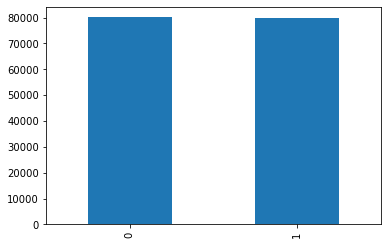

In [12]:
## label 분포/비율 확인

print(train_d['label'].value_counts())

train_d['label'].value_counts().plot(kind='bar')

# 비율 약 반반 좋은 비율을 보이고 있다.

In [13]:
## 데이터 정제
## 정규표현식 - 특수기호 제거

train_d['review'] = train_d['review'].str.replace("[^ㄱ-힣 ]", "")
train_d.head()

/var/folders/l3/9vpjfz8n5891msycbstmlfdm0000gn/T/ipykernel_2286/4062577299.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  train_d['review'] = train_d['review'].str.replace("[^ㄱ-힣 ]", "")
/var/folders/l3/9vpjfz8n5891msycbstmlfdm0000gn/T/ipykernel_2286/4062577299.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_d['review'] = train_d['review'].str.replace("[^ㄱ-힣 ]", "")


,ratings,review,label
99718,2,땅콩잼이 기름이 너무 분리가 되어서 섞었는데도 저 정도네요 빵에 뭍히면 기름이 뚝뚝...,0
105392,2,생각보다 얇구요 너무컸습니다,0
148751,2,압출기 별로예요 좀 더 주고 제대로 얇은 압출기 사야지 이건 뭉툭해서 압출도 잘 안...,0
183870,5,베송빠르고 노란끼 잡아줌,1
195209,4,이거좋아요 식당에서 콘치즈 맛있게 먹길래 주문했는데 엄청 잘먹네요 좋아요 사이즈도좋...,1


In [14]:
## 특수기호 지우고 혹시 리뷰가 null 값이 생겼는지 확인
print(train_d['review'].isnull().any())

## 혹시 리뷰가 빈칸이 되었는지 그래서 null 값이 되었나 확인
train_d['review'].replace("", np.nan, inplace=True)
train_d['review'].isnull().any()

False


/Users/yunheekim/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


False

In [15]:
test_d['review'] = test_d['review'].str.replace("[^ㄱ-힣 ]", "")
test_d['review'].replace("", np.nan, inplace=True)
test_d.isnull().any()

/var/folders/l3/9vpjfz8n5891msycbstmlfdm0000gn/T/ipykernel_2286/4161515091.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  test_d['review'] = test_d['review'].str.replace("[^ㄱ-힣 ]", "")
/var/folders/l3/9vpjfz8n5891msycbstmlfdm0000gn/T/ipykernel_2286/4161515091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_d['review'] = test_d['review'].str.replace("[^ㄱ-힣 ]", "")


ratings    False
review     False
label      False
dtype: bool

In [16]:
## 토큰화
## 형태소 분석기 Mecab 을 사용!

from konlpy.tag import Mecab

mecab = Mecab()


In [17]:
## 토큰화

train_d['tokens'] = train_d['review'].apply(mecab.morphs)
test_d['tokens'] = test_d['review'].apply(mecab.morphs)

train_d['tokens']

/var/folders/l3/9vpjfz8n5891msycbstmlfdm0000gn/T/ipykernel_2286/140257219.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_d['tokens'] = train_d['review'].apply(mecab.morphs)
/var/folders/l3/9vpjfz8n5891msycbstmlfdm0000gn/T/ipykernel_2286/140257219.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_d['tokens'] = test_d['review'].apply(mecab.morphs)


99718     [땅콩, 잼, 이, 기름, 이, 너무, 분리, 가, 되, 어서, 섞, 었, 는데, ...
105392                          [생각, 보다, 얇, 구요, 너무, 컸, 습니다]
148751    [압출기, 별, 로, 예요, 좀, 더, 주, 고, 제대로, 얇, 은, 압출기, 사,...
183870                          [베송, 빠르, 고, 노란, 끼, 잡, 아, 줌]
195209    [이거, 좋, 아요, 식당, 에서, 콘, 치즈, 맛있, 게, 먹, 길래, 주문, 했...
                                ...                        
66481                                 [괜찮, 아요, 담, 에, 재, 구매]
54344                                      [입기, 가, 불편, 합니다]
115530                                 [항상, 쓰, 는, 페넬로페, ㅎㅎ]
76438                    [너무, 좋, 아요, 안, 샀으면, 어쨌, 을까, 싶, 어요]
196692                               [입, 어, 봣는데, 엄청, 편해, 여]
Name: tokens, Length: 160000, dtype: object

In [18]:
train_d.head()

,ratings,review,label,tokens
99718,2,땅콩잼이 기름이 너무 분리가 되어서 섞었는데도 저 정도네요 빵에 뭍히면 기름이 뚝뚝...,0,"[땅콩, 잼, 이, 기름, 이, 너무, 분리, 가, 되, 어서, 섞, 었, 는데, ..."
105392,2,생각보다 얇구요 너무컸습니다,0,"[생각, 보다, 얇, 구요, 너무, 컸, 습니다]"
148751,2,압출기 별로예요 좀 더 주고 제대로 얇은 압출기 사야지 이건 뭉툭해서 압출도 잘 안...,0,"[압출기, 별, 로, 예요, 좀, 더, 주, 고, 제대로, 얇, 은, 압출기, 사,..."
183870,5,베송빠르고 노란끼 잡아줌,1,"[베송, 빠르, 고, 노란, 끼, 잡, 아, 줌]"
195209,4,이거좋아요 식당에서 콘치즈 맛있게 먹길래 주문했는데 엄청 잘먹네요 좋아요 사이즈도좋...,1,"[이거, 좋, 아요, 식당, 에서, 콘, 치즈, 맛있, 게, 먹, 길래, 주문, 했..."


In [19]:
##  불용어 지정

stop_words = ['도', '은', '는', '이', '가', '다', '의', '에', '고', '게', '을', '를', '과', '와', '았', '있', '요'
                ,'거', '어', '아', '지', '했', '아요', '어요', '네요']

In [20]:
## 필요없는 토큰 (불용어) 제거

train_d['tokens'] = train_d['tokens'].apply(lambda x: [i for i in x if i not in stop_words])
test_d['tokens'] = test_d['tokens'].apply(lambda x: [i for i in x if i not in stop_words])

train_d.head()

/var/folders/l3/9vpjfz8n5891msycbstmlfdm0000gn/T/ipykernel_2286/775328293.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_d['tokens'] = train_d['tokens'].apply(lambda x: [i for i in x if i not in stop_words])
/var/folders/l3/9vpjfz8n5891msycbstmlfdm0000gn/T/ipykernel_2286/775328293.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_d['tokens'] = test_d['tokens'].apply(lambda x: [i for i in x if i not in stop_words])


,ratings,review,label,tokens
99718,2,땅콩잼이 기름이 너무 분리가 되어서 섞었는데도 저 정도네요 빵에 뭍히면 기름이 뚝뚝...,0,"[땅콩, 잼, 기름, 너무, 분리, 되, 어서, 섞, 었, 는데, 저, 정도, 빵,..."
105392,2,생각보다 얇구요 너무컸습니다,0,"[생각, 보다, 얇, 구요, 너무, 컸, 습니다]"
148751,2,압출기 별로예요 좀 더 주고 제대로 얇은 압출기 사야지 이건 뭉툭해서 압출도 잘 안...,0,"[압출기, 별, 로, 예요, 좀, 더, 주, 제대로, 얇, 압출기, 사, 야지, 이..."
183870,5,베송빠르고 노란끼 잡아줌,1,"[베송, 빠르, 노란, 끼, 잡, 줌]"
195209,4,이거좋아요 식당에서 콘치즈 맛있게 먹길래 주문했는데 엄청 잘먹네요 좋아요 사이즈도좋...,1,"[이거, 좋, 식당, 에서, 콘, 치즈, 맛있, 먹, 길래, 주문, 는데, 엄청, ..."


In [21]:
## 긍정 / 부정 단어 모으기

neg_words = np.hstack(train_d[train_d.label == 0]['tokens'].values)
pos_words = np.hstack(train_d[train_d.label == 1]['tokens'].values)

print(neg_words)
print(pos_words)

['땅콩' '잼' '기름' ... '입기' '불편' '합니다']
['베송' '빠르' '노란' ... '엄청' '편해' '여']


In [22]:
## 긍정 / 부정 단어 빈도 수 체크

from collections import Counter

neg_word_count = Counter(neg_words)
print(neg_word_count.most_common(20))

pos_word_count = Counter(pos_words)
print(pos_word_count.most_common(20))

[('하', 31941), ('는데', 21651), ('안', 21105), ('너무', 14048), ('한', 11430), ('좋', 10408), ('배송', 10352), ('같', 9545), ('구매', 9433), ('없', 9334), ('습니다', 8979), ('되', 8934), ('그냥', 8890), ('잘', 8605), ('않', 8431), ('나', 8084), ('만', 7353), ('로', 7080), ('기', 6902), ('것', 6883)]
[('좋', 42048), ('하', 33931), ('잘', 19762), ('구매', 17274), ('습니다', 14353), ('배송', 12981), ('는데', 12409), ('합니다', 10364), ('먹', 10230), ('재', 9923), ('너무', 8944), ('같', 8384), ('한', 7874), ('만족', 7763), ('쓰', 6731), ('기', 6660), ('들', 6510), ('사용', 6325), ('해서', 5764), ('되', 5525)]


In [23]:
## Counter로 하면 그래프가 안그려진당

import nltk

n_twords = nltk.Text(neg_words)
print(n_twords.vocab().most_common(10))

p_twords = nltk.Text(pos_words)
print(p_twords.vocab().most_common(10))

[('하', 31941), ('는데', 21651), ('안', 21105), ('너무', 14048), ('한', 11430), ('좋', 10408), ('배송', 10352), ('같', 9545), ('구매', 9433), ('없', 9334)]
[('좋', 42048), ('하', 33931), ('잘', 19762), ('구매', 17274), ('습니다', 14353), ('배송', 12981), ('는데', 12409), ('합니다', 10364), ('먹', 10230), ('재', 9923)]


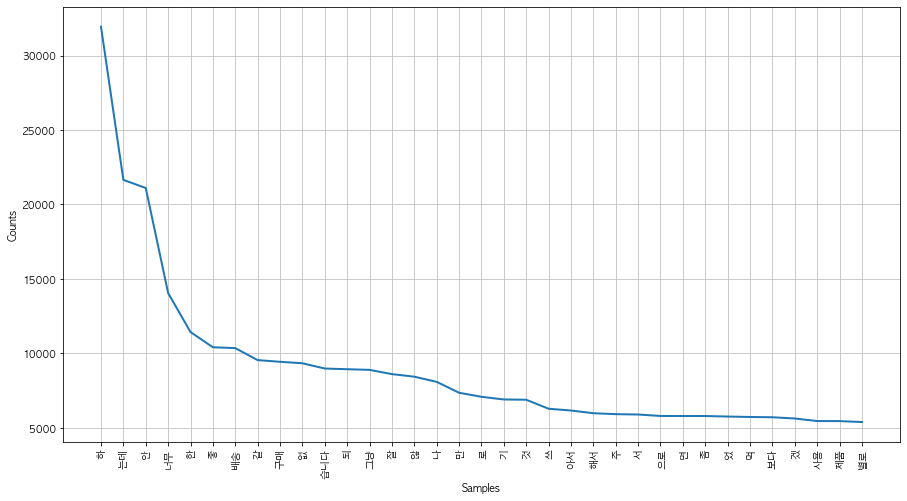

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz
from matplotlib import rc

# 한글 폰트 사용을 위해서 세팅
rc('font', family='AppleGothic') 
plt.rcParams['axes.unicode_minus'] = False 

plt.figure(figsize=(15,8))
n_twords.plot(35)
plt.show();

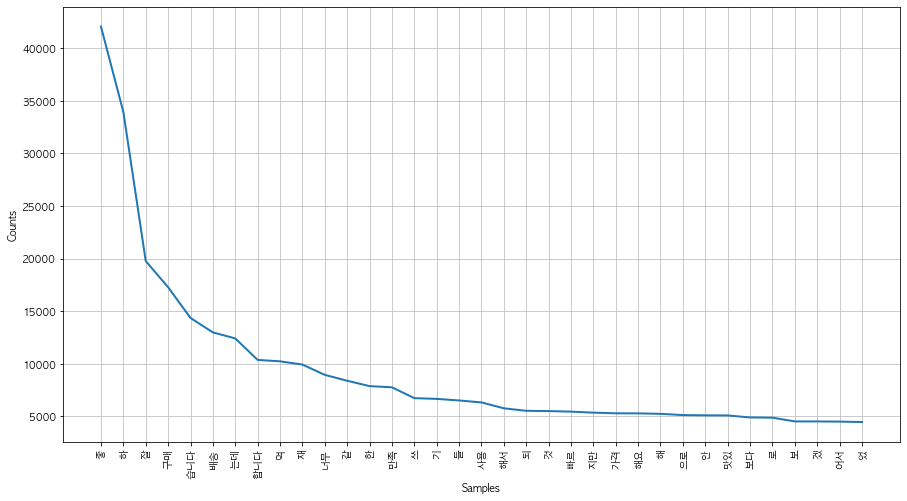

In [25]:
plt.figure(figsize=(15,8))
p_twords.plot(35)
plt.show();

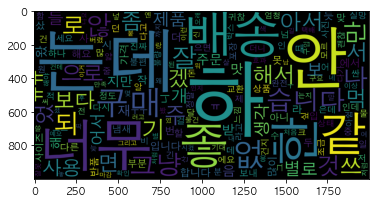

In [29]:
from wordcloud import WordCloud

wc = WordCloud(font_path='AppleGothic', width=1000, height=500, scale=2.0, max_font_size=250)
neg_gen = wc.generate_from_frequencies(neg_word_count)
plt.figure()
plt.imshow(neg_gen);

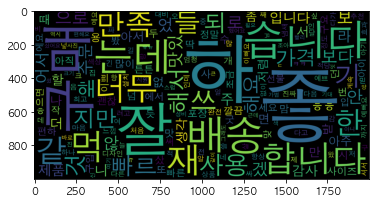

In [30]:
wc = WordCloud(font_path='AppleGothic', width=1000, height=500, scale=2.0, max_font_size=250)
pos_gen = wc.generate_from_frequencies(pos_word_count)
plt.figure()
plt.imshow(pos_gen);

In [31]:
## 데이터 X, y split

X_train = train_d['tokens'].values
y_train = train_d['label'].values
X_test= test_d['tokens'].values
y_test = test_d['label'].values

X_train

array([list(['땅콩', '잼', '기름', '너무', '분리', '되', '어서', '섞', '었', '는데', '저', '정도', '빵', '뭍히', '면', '기름', '뚝뚝', '떨어져서', '손', '며', '바닥', '뭍']),
       list(['생각', '보다', '얇', '구요', '너무', '컸', '습니다']),
       list(['압출기', '별', '로', '예요', '좀', '더', '주', '제대로', '얇', '압출기', '사', '야지', '이건', '뭉툭', '해서', '압출', '잘', '안', '되', 'ㅎㅎㅎ', '아쉽', '또', '사', '야죠', '뭐', '저렴', '하', '니']),
       ..., list(['항상', '쓰', '페넬로페', 'ㅎㅎ']),
       list(['너무', '좋', '안', '샀으면', '어쨌', '을까', '싶']),
       list(['입', '봣는데', '엄청', '편해', '여'])], dtype=object)

In [1]:
# !pip install --upgrade appnope

  Using cached appnope-0.1.3-py2.py3-none-any.whl (4.4 kB)
  Attempting uninstall: appnope
    Found existing installation: appnope 0.1.2
    Uninstalling appnope-0.1.2:
      Successfully uninstalled appnope-0.1.2
Note: you may need to restart the kernel to use updated packages.


이 이후 셀부터는 M1 에서는 Kernel Crash 에러가 생긴다.
그래서 Colab 으로 이동하여 진행!

** Colab 에서는 한글 경로 없음으로 wordcloud가 생성되지 않아 wordcloud는 로컬에서 진행하였다!

In [2]:
# import tensorflow as tf

: 

: 

In [ ]:
# from tensorflow.keras.layers import Embedding, Dense, GRU
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(22000, embedding_dim))
model.add(GRU(hidden_units))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)